In [108]:
import re
import requests                
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


# url address to request web page
URL = "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States"
try:
    r = requests.get(URL).text
except Exception as e:
    print(e)

page = open('List_of_presidents_of_the_United_States.html', 'r').read()

soup = BeautifulSoup(r, 'lxml')

table = soup.find('table', {'class': 'wikitable'})


def tableDataText(table):    
    """Parses a html segment started with tag <table> followed 
    by multiple <tr> (table rows) and inner <td> (table data) tags. 
    It returns a list of rows with inner columns. 
    Accepts only one <th> (table header/data) in the first row.
    """
    def rowgetDataText(tr, coltag='td'): # td (data) or th (header)
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]  
    rows = []
    trs = table.find_all('tr')
    headerow = rowgetDataText(trs[0], 'th')
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append(rowgetDataText(tr, 'td') ) # data row       
    return rows

headers = ['Number', 'Presidency', 'Image', 'Presidents', 'Prior Office',
           'black', 'Party', 'Election', 'Vice President']

list_table = tableDataText(table)
dataframe = pd.DataFrame(list_table[2:], columns=headers)

def first_names_tot_presidents():
    names = []
    for name in dataframe['Presidents']:
        if name:
            names.append(name.split()[0])
    return names, len(names)


In [97]:
# show the dataframe remove Nan Values
dataframe

,Number,Presidency,Image,Presidents,Prior Office,black,Party,Election,Vice President
0,1,"April 30, 1789[d]–March 4, 1797",,George Washington1732–1799(Lived 67 years)[3][...,Commander-in-Chiefof theContinental Army(1775–...,,Unaffiliated[2],1788–89,John Adams[e][f]
1,1792,None,None,None,None,None,None,None,None
2,2,"March 4, 1797–March 4, 1801",,John Adams1735–1826(Lived 90 years)[6][7][8],1stvice president of the United States(1789–1797),,Federalist,1796,Thomas Jefferson[g]
3,3,"March 4, 1801–March 4, 1809",,Thomas Jefferson1743–1826(Lived 83 years)[9][1...,2ndvice president of the United States(1797–1801),,Democratic-Republican,1800,"Aaron BurrMarch 4, 1801–March 4, 1805"
4,1804,"George ClintonMarch 4, 1805–March 4, 1809",None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
75,43,"January 20, 2001–January 20, 2009",,George W. BushBorn 1946(73 years old)[126][127...,46thgovernor of Texas(1995–2000),,Republican,2000,Dick Cheney
76,2004,None,None,None,None,None,None,None,None
77,44,"January 20, 2009–January 20, 2017",,Barack ObamaBorn 1961(58 years old)[129][130][...,U.S. senator(Class 3)fromIllinois(2005–2008),,Democratic,2008,Joe Biden
78,2012,None,None,None,None,None,None,None,None


In [ ]:
# How many presidents on the page
number = first_names_tot_presidents()[1]
print(f"How many presidents on the page : {number}")


In [56]:
# Which presidents were assasinated
assassination_pattern = re.compile(r'''Assassinated''')
assassinated = []
for index in range(len(dataframe['Presidency'])):
    if dataframe['Presidency'][index]:
        if assassination_pattern.search(dataframe['Presidency'][index]):
            assassinated.append(dataframe['Presidents'][index])
print(assassinated)


['Abraham Lincoln1809–1865(Lived 56 years)[48][49][50]', 'James A. Garfield1831–1881(Lived 49 years)[60][61][62]', 'William McKinley1843–1901(Lived 58 years)[72][73][74]', 'John F. Kennedy1917–1963(Lived 46 years)[102][103][104]']


In [130]:
# presidents selected after serving as senators
senators = []
senator_pattern = re.compile(r'''^U.S Senator$''')
for index in range(len(dataframe['Prior Office'])):
    if dataframe['Prior Office'][index]:
        if senator_pattern.search(dataframe['Prior Office'][index]):
            senators.append(dataframe['Presidents'][index])
print(senators)



[]


In [80]:
# presidents selected after serving as vice presidents
vices = []
vp_pattern = re.compile(r'vice president')
for index in range(len(dataframe['Prior Office'])):
    if dataframe['Prior Office'][index]:
        if vp_pattern.search(dataframe['Prior Office'][index]):
            vices.append(dataframe['Presidents'][index])
print(vices)


['John Adams1735–1826(Lived 90 years)[6][7][8]', 'Thomas Jefferson1743–1826(Lived 83 years)[9][10][11]', 'Martin Van Buren1782–1862(Lived 79 years)[24][25][26]', 'John Tyler1790–1862(Lived 71 years)[30][31][32]', 'Millard Fillmore1800–1874(Lived 74 years)[39][40][41]', 'Andrew Johnson1808–1875(Lived 66 years)[51][52][53]', 'Chester A. Arthur1829–1886(Lived 57 years)[63][64][65]', 'Theodore Roosevelt1858–1919(Lived 60 years)[75][76][77]', 'Calvin Coolidge1872–1933(Lived 60 years)[87][88][89]', 'Harry S. Truman1884–1972(Lived 88 years)[96][97][98]', 'Lyndon B. Johnson1908–1973(Lived 64 years)[105][106][107]', 'Richard Nixon1913–1994(Lived 81 years)[108][109][110]', 'Gerald Ford1913–2006(Lived 93 years)[111][112][113]', 'George H. W. Bush1924–2018(Lived 94 years)[120][121][122]']


In [61]:
# which president had one VP for duration of term
def with_one_vp_on_term():
    pass



In [261]:

# which president was in office for long time and when he left
year_pattern = re.compile(r'\d\d\d\d')
term_in_office = []
president_and_term = {}
for i in filter(None, dataframe['Presidency']):
    if year_pattern.search(i):
        term_in_office.append((int(year_pattern.search(i).group(0))))
        
print(term_in_office)



[1789, 1797, 1801, 1805, 1809, 1813, 1817, 1825, 1829, 1833, 1837, 1841, 1841, 1841, 1845, 1849, 1850, 1853, 1857, 1861, 1864, 1865, 1868, 1869, 1873, 1877, 1881, 1881, 1885, 1889, 1893, 1897, 1901, 1901, 1905, 1909, 1913, 1921, 1923, 1925, 1929, 1933, 1941, 1945, 1945, 1949, 1953, 1961, 1963, 1965, 1969, 1974, 1977, 1981, 1989, 1993, 2001, 2009, 2017]


In [140]:

# How many presidents with same forenames? 
forenames = {name:0 for name in first_names_tot_presidents()[0]}
for key, value in forenames.items():
    for name in filter(None, dataframe['Presidents']):
        if key == name.split()[0]:
            forenames[key] += 1
        continue

# This prints the names and the total for that name
# print(forenames)
total = 0
for key in forenames.keys():
    if forenames[key] > 1:
        total += 1

# Total number of presidents with similar forenames
print(total)
        





7


In [64]:

# oldest president ever elected
def oldest_president_ever_elected():
    pass


In [65]:

# youngest president elected
def youngest_president_elect():
    pass


In [66]:

# president who lived to an old age after leaving office
def president_who_lived_to_old_age_after_office():
    pass


{'Democratic': 19, 'Republican': 19, 'National Union': 1, 'Federalist': 1, 'Whig': 4, 'Unaffiliated': 1}


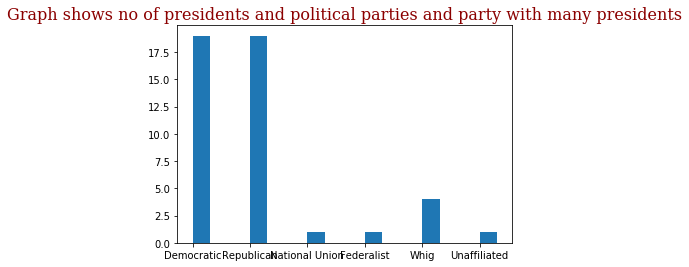

In [120]:
# Graph that shows no. of presidents and their respective political parties and party with many presidents
parties = {"Democratic":0 , "Republican":0, "National Union":0, "Federalist":0, "Whig":0, "Unaffiliated":0}
for key,value in parties.items():
    for party in filter(None, dataframe['Party']):
        if party.startswith(key):
            parties[key] += 1
        continue
        
print(parties)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Graph shows no of presidents and political parties and party with many presidents', fontdict=font)
plt.bar(*zip(*parties.items()), align='edge', width=0.3)
plt.show()
    
                
                
        
        

